# O1

#### SWMAL
#### Assignment 1
Groupmembers: Nilas Lorenzen (202307961), Peter Fabiansen (202305295), Rasmus Møller (202305159)

\pagebreak


# L01 - Intro

Code given:

$\begin{array}{rl} F_1 &= \frac{2pr}{p+r} \end{array}$

In [27]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [28]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


In [29]:
import os
# os.path.join handles the path
datapath = os.path.join("GITMAL", "datasets", "lifesat", "")

# This check ensures you are in the right place before loading data
if not os.path.exists(datapath):
    print(f"ERROR: Datapath not found at {os.path.abspath(datapath)}")
else:
    print(f"OK: Found datasets at {os.path.abspath(datapath)}")

# Run system command to verify files exist
! dir "{datapath}"

OK: Found datasets at c:\Users\bruger\Desktop\unii\6.sem\SWMAL\git-rep\SWMALLER-1\O1\GITMAL\datasets\lifesat
 Volume in drive C has no label.
 Volume Serial Number is 1E52-7239

 Directory of c:\Users\bruger\Desktop\unii\6.sem\SWMAL\git-rep\SWMALLER-1\O1\GITMAL\datasets\lifesat

11-02-2026  12:12    <DIR>          .
11-02-2026  12:12    <DIR>          ..
03-02-2026  14:25            36.323 gdp_per_capita.csv
03-02-2026  14:25               814 lifesat.csv
03-02-2026  14:25           405.467 oecd_bli_2015.csv
03-02-2026  14:25             4.405 README.md
               4 File(s)        447.009 bytes
               2 Dir(s)  290.290.335.744 bytes free


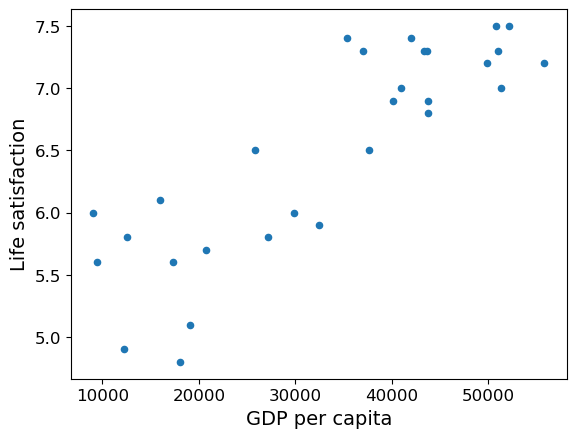

[[5.96242338]]
OK


In [30]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

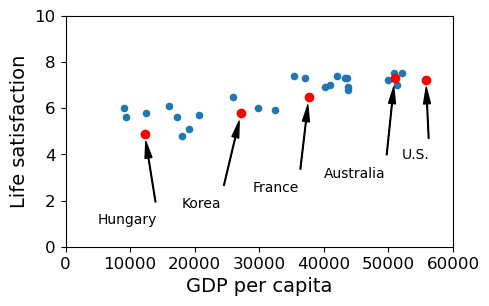

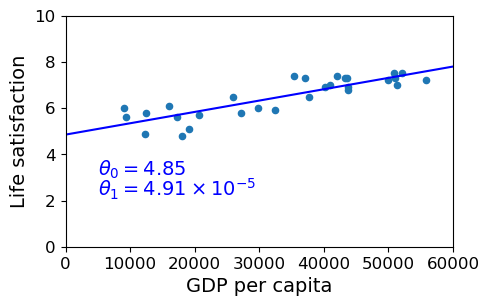

OK


In [31]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

### 1.4.2. Qa) The parameters $\theta_0$ and $\theta_1$ and $R^2$ the Score

Finding the and is relatively simple in our notation, referencing https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html it is done by extracting .intercept and .coef

In [32]:
θ_0 = model.intercept_
θ_1 = model.coef_
print("θ_0 and θ_1 are respectively", θ_0, θ_1)

θ_0 and θ_1 are respectively [4.8530528] [[4.91154459e-05]]


In [33]:
R2 = model.score(X,y)
print("R2 is then extracted to be", R2)

R2 is then extracted to be 0.7344414355437031


### Qb) Using k-Nearest Neighbors

X.shape= (29, 1)
y.shape= (29, 1)


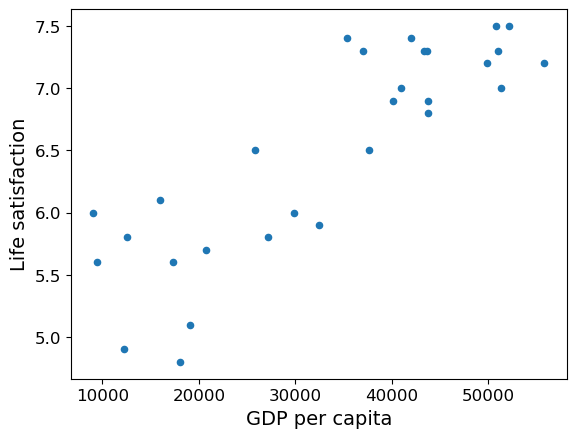

y_pred = [[5.76666667]]
The nearest neighbour models score is 0.8525732853499179


In [34]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model

# TODO: add your code here..
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
knn.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = knn.predict(X_new)
print("y_pred =", y_pred)

knnscore = knn.score(X,y)
print("The nearest neighbour models score is", knnscore)

According to https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html the Knn model also returns the $R^2$ when calling model.score. We see that it is quite a bit better than that of the linear regressor.

### 1.5.2. Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

y_pred = [[5.7]]
The nearest neighbour models score is 1.0
[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]
 [50961.865]
 [51350.744]
 [52114.165]
 [55805.204]]


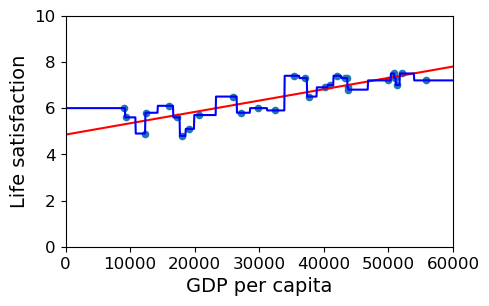

In [35]:
knn= sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)

# Train the model
knn.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = knn.predict(X_new)
print("y_pred =", y_pred)

knnscore = knn.score(X,y)
print("The nearest neighbour models score is", knnscore)

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create  test matrix M, with the same dimensionality as X, and in the range [0;60000] 
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M) 

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
print(X)

When initiated with n_neighbours = 1 we get a score of 1 which either indicates a perfect model (unlikely) or more likely the neighbour counted first is the point it self, leading to nothing but perfect predictions but no ability to predict the overall correlation. Furthermore we see that we have not split X and y into a test and train set indicating that we are using already known values to test how good the model is at predicting. 

### 1.5.3. Qd) Trying out a Neural Networkfrom sklearn.neural_network import MLPRegressor

y_pred = [4.07671125]
The score for the nn is -3.6741440524089137


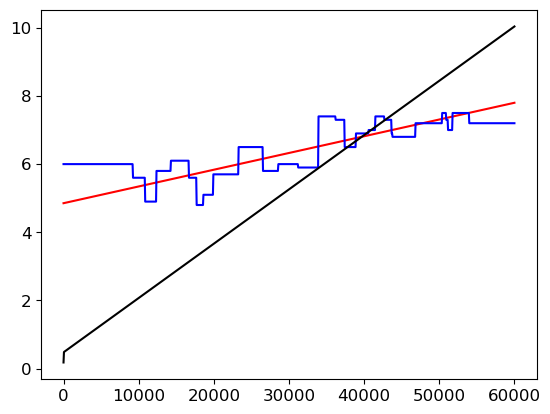

In [36]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=False)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = mlp.predict(X_new)
print("y_pred =", y_pred)

nnscore = mlp.score(X,y)
print("The score for the nn is",nnscore)

While the Neural network does return the $R^2$ value when .score is called it is clear that a score of order -$10^3$ is far from as good as the others, this might stem from the fact that this dataset is not very suitable for the MLP model, at least not without some adjustement.

### 1.5.4. Qe) Neural Network with pre-scaling

Scaled input: [[0.37645]]
y_pred = [6.11008679]
The new score for the nn is 0.7242636173560772


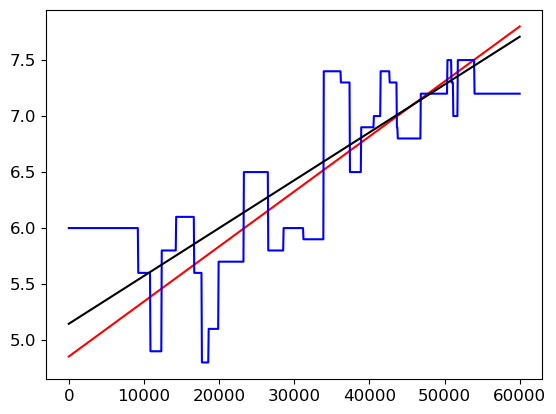

In [37]:
from sklearn.neural_network import MLPRegressor
# lets scale the data to something more suitable for the MLP using the MinMaxsclaer from sklearn
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=False)
mlp.fit(X_scaled, y.ravel())

# lets make a MLP regressor prediction and redo the plots
M_scaled = scaler.fit_transform(M)
y_pred_mlp = mlp.predict(M_scaled) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita

# Scale
X_new_scaled = scaler.transform(X_new)
y_pred = mlp.predict(X_new_scaled)

print(f"Scaled input: {X_new_scaled}")
print("y_pred =", y_pred)

nnscore = mlp.score(X_scaled,y)
print("The new score for the nn is",nnscore)

We see that when the data is properly scaled to what the model might expect the $R^2$ is much better (closer to 1) while it does not fit as well as the other two models, it is better. Wierdly linear though.

# L02 - Modules and classes

#### Qa Load and test the libitmal module
We have to try out the libitmal module from the repository by loading the module and running the TestAll function.

The Git repository was cloned to a folder `SWMAL`.

The path was then created as: setx PYTHONPATH `C:\Users\nilas\Documents\SWMAL\GITMAL` in the terminal/Powershell which loads the path into the operating system, which is then imported into the notebook, such that the path can be found. Alternatively the path could also be created by adding the path to the environment variables. This path is shown on the picture below for one of our computers.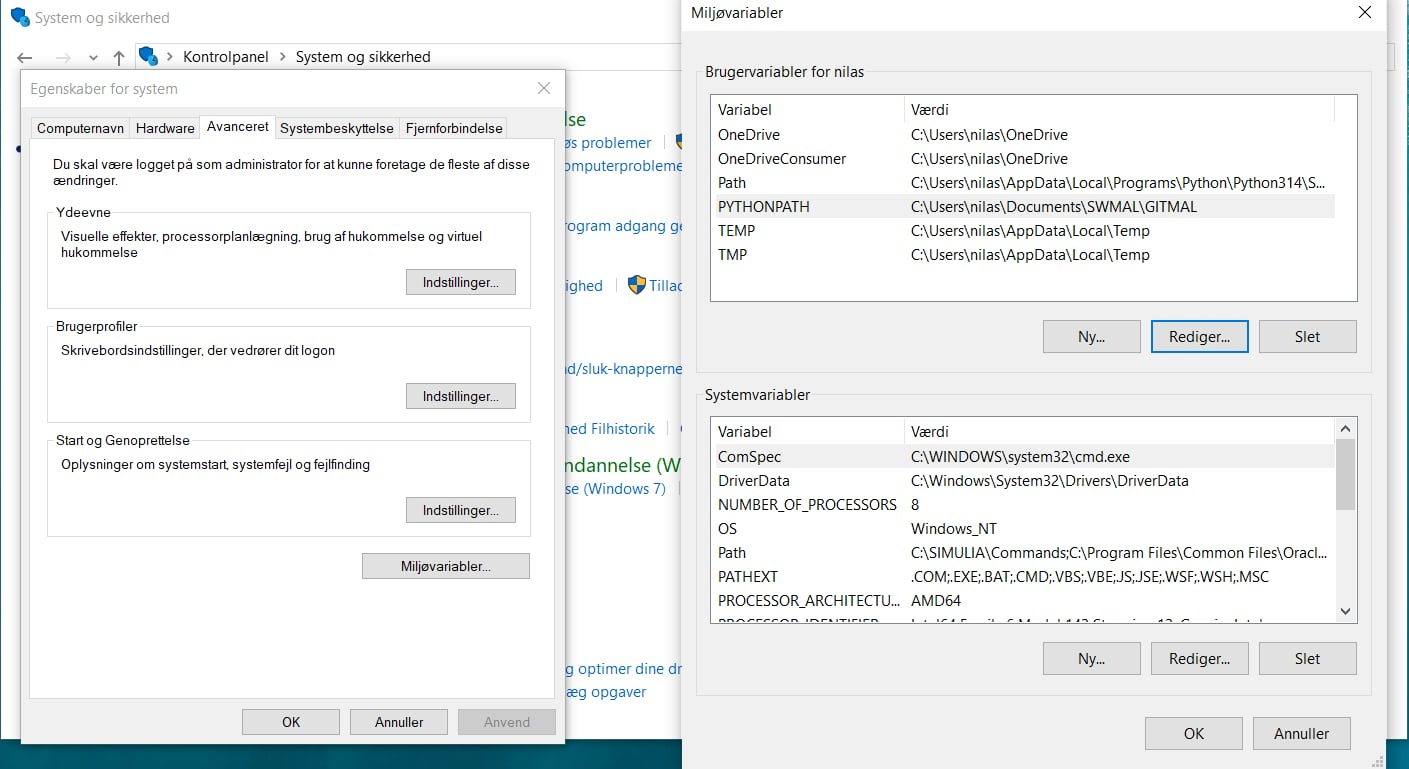

The module can then be loaded and tested as shown below.


In [ ]:
# Code for Qa
import os
from libitmal import utils as itmalutils
itmalutils.TestAll()

TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


#### Qb Create your own module, with some functions, and test it
We have to create, load and run our own module with a random functionality 

As a simple modul, a summation functionality was created which just adds two numbers together. As def add(a,b), return a+b, in a .py file simply named Summation and then imported into the notebook. The python code can be seen at the bottom. For easy importation the file can simply placed in the same folder as the notebook, but for illustration it is placed in a folder and a path thus has to be created to import the module. The file placement is thus: `C:\Users\nilas\Documents\SWMAL\L02\Modules\Summation.py`. The file tress looks like:
```
Modules/
├── __pycache__
│   ├── Summation.cpython-313.pyc
├── Summation.py
```

And the importation and implementation can then be done as:


In [ ]:
# Code for Qb
import sys
sys.path.insert(0, r"C:\Users\nilas\Documents\SWMAL\L02\Modules")
import Summation
x=Summation.add(2,5)
print(x)


7


#### Qc How do you 'recompile' a module?
We have to describe how Jupyter notebook can be forced to re-load module channges

The module code was changed from addition to substraction, but still gave the same result when running the previous code. To re-load the module changes the module "importlib" can be used to reload the module changes which gives the correct results. Same result can also be achieved by restarting the kernel, which restarts all variables.

In [ ]:
# Code for Qc
z=Summation.add(2,5)
print(z)

import importlib
importlib.reload(Summation)
y=Summation.add(2,5)
print(y)

7
-3


####  Qd Write a Howto on Python Modules a Packages
We have to write a short desription of how modules is used in Python.

A module is a piece of reusable code like a function or class stored in a .py file. This makes the repeatable call and implemntation of a single piece of code simple, which is especially useful for code that has to be used many times or in loops. Depending on the modules location, a path might have to be created to import the modules. This can be avoided by placing it in the same folder as the notebook but this can easily create confusion in the case of many modules.

The import directives is used to import the modules into the workspace from the directory. Typical directives can be seen in the code below. A directory is a collection of files. The structure of the directory often depends on the size of the projects with it being convenient to place the modules and notebooks in the same folder for smaller projects, but for bigger projects they are commonly placed in a sub-folder.

A python package can be defined as a unit containing several modules or folders containing modules. 

In [ ]:
# Code for Qd
import Summation
Summation.add(2,5)
from Summation import add
add(2,5)
import Summation as addition
addition.add(2,5)

#### Qe Extend the class with some public and private functions and member variables

We have to describe how private function and member variables are represented in python classes, what the meaning of `self` is in python classes and what happens to a function inside a class if `self` is forgotten in the parameter list, for example in the demo code.

Private functions is represented in python by naming convention, where an underscore, "_name", means it is for internal use, but this is purely for convention and it is still accesible. Therefore a double underscore, "__name" is often used instead, which triggers name mangeling, rewritting "__name" inside class "myclass" as "_myclass__name".

`self` is a reference to the considered object. It tells python which object the function has to be used on. If a function is defined without self, python will automatically assume the first argument is the object, which causes an error to occur, since an additional argument is given compared to what is expected.

This can be shown with the demo code by

In [ ]:
# Code for Qe
class MyClass:
   
    def myfun():
        self.myvar = "blah" # NOTE: a per class-instance variable.
        print(f"This is a message inside the class, myvar={self.myvar}.")

myobjectx = MyClass()
myobjectx.myfun()

TypeError: MyClass.myfun() takes 0 positional arguments but 1 was given

As expected an error occurs where it expects no arguments but 1 is given because it assumes the first arguement is the object.

#### Qf Extend the class with a Constructor
We have to figure out how to declare/define a constructor in a python class and explain how it is done in python.

A constructor is the part of class which initialize the state of a new object when it is created. In python it defined as a function `__init__`, which is automatically called when the object is created. An example of this can be seen in the code.

It should be noted that all members of this group is studying mechanical engineering and we have therefore not learned about any of these things in previous courses. The question regarding the deconstructor will thus according to the instructions of the lector be skipped.

In [ ]:
# Code for Qf
class dog:
    def __init__(self, name, age):
        self.name=name
        self.age=age
Puppy=dog("Chik", 0.5)
print(Puppy.name,Puppy.age)


Chik 0.5


#### Qg Extend the class with a to-string function
We have to find a way to serialize a class and explain what the pythonic way of printing a class instance is.

To convert an object to string using class functionality in python is done by defining a function `__str__` in the class. This function will then automatically be called when we attempt to print the object. Alternatively `__repr__` can also be used but `__str__` is generally more user friendly.

An example of how this to-string function is used can be seen in the code below.


In [ ]:
# Code for Qg
class dog:
    def __init__(self, name, age):
        self.name=name
        self.age=age
    def __str__(self):
        return f"dog({self.name}, {self.age})"
        
Puppy=dog("Chik", 0.5)
print(Puppy)

dog(Chik, 0.5)


####  Qh Write a Howto on Python Classes 
We have to write a guide on how to use classes in python, including a description of public and privacy, construnctors/desctructors, the meaning of `self` and inheritance.

A class is in python use assemble data and behaviors which are related. Privacy is typically not directly enforced but is instead based on conventions with underscores, no underscore being public, _ being internal and __ resulting in name mangeling to avoid clashes. Constructors are used to initialize the values of the created object, storing the parameters in the object. self is a reference to the current object which has to be included because python automatically assumes the first arguement is the object. If it is forgotten this causes an error because the number of arguments is not the same as the expected. Inheritance is used to create a parent and child relation between classes, assigning one class as a subclass of another.


# LO3 - Classification
### Qa Load and display the MNIST data

In [ ]:
import numpy as np

def MNIST_GetDataSet(action,print):
    if action==1:
        from sklearn.datasets import fetch_openml
        # Load data from https://www.openml.org/d/554
        X, y = fetch_openml('mnist_784',return_X_y=True, cache=True) # Returns two distinct values, saves locally to avoid reloading
        # Convert to [0;1] via scaling 
        X = X / 255.
        if print==1:
            %matplotlib inline
            def MNIST_PlotDigit(data):
             import matplotlib
             import matplotlib.pyplot as plt
             image = data.reshape(28, 28)
             plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
             plt.axis("off")
        # Force the first row of X to be a generic array instead of pandas formatting, also serves as a test for working import of data.
             MNIST_PlotDigit(X.to_numpy()[0])
        else:
           pass

        return X, y

    else:
        pass

MNIST_GetDataSet(1,1)


(       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
        pixel1

### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

In [ ]:
# 1. Imports
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
SGDC = SGDClassifier()
X, y = MNIST_GetDataSet(1,0)

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

X.shape=(70000, 784)
X.shape=(70000, 784)


Training the model...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


Found 728 correct 5s and 67 false positives.


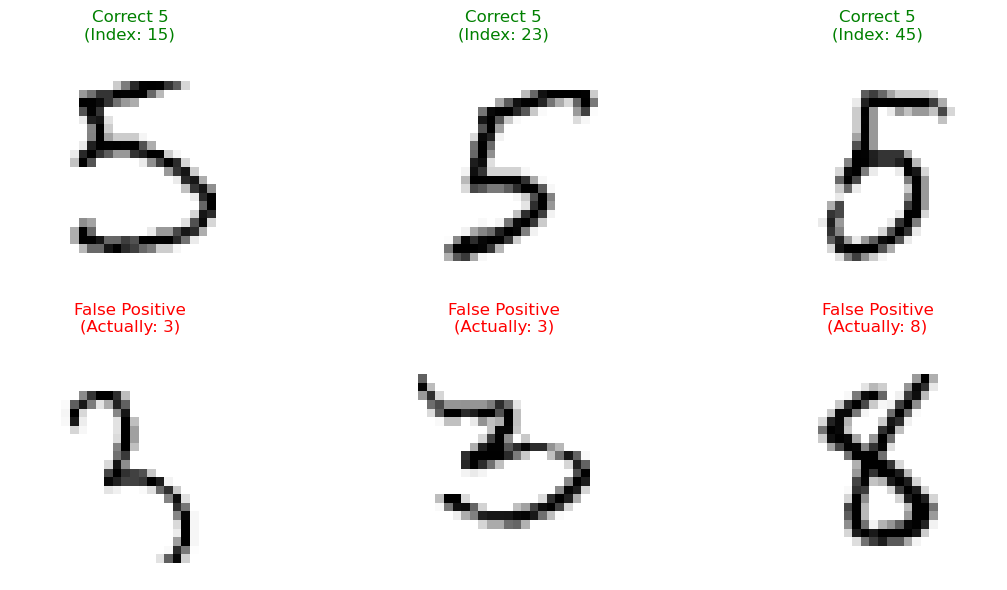

In [ ]:
#Split into the first 60000 of X and y to train and the rest is test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# The binary y classification
y_train_5 = (y_train == '5') 
y_test_5 = (y_test == '5')

# Ensuring the numbers are the correct type of array
X_test_np = X_test.to_numpy()
y_test_np = y_test_5.to_numpy()

#Fit
print("Training the model...")
SGD = SGDC.fit(X_train, y_train_5)

#Predict
y_test_pred = SGDC.predict(X_test_np)


import matplotlib.pyplot as plt


tp_indices = np.where((y_test_pred == True) & (y_test_np == True))[0]

fp_indices = np.where((y_test_pred == True) & (y_test_np == False))[0]

print(f"Found {len(tp_indices)} correct 5s and {len(fp_indices)} false positives.")

# --- 3. Plotting Function ---
def plot_digit(data, ax):
    image = data.reshape(28, 28)
    ax.imshow(image, cmap = plt.cm.binary, interpolation="nearest")
    ax.axis("off")

plt.figure(figsize=(12, 6))

for i in range(3):
    ax = plt.subplot(2, 3, i + 1)
    if i < len(tp_indices):
        idx = tp_indices[i]
        plot_digit(X_test_np[idx], ax)
        ax.set_title(f"Correct 5\n(Index: {idx})", color="green")

for i in range(3):
    ax = plt.subplot(2, 3, i + 4)
    if i < len(fp_indices):
        idx = fp_indices[i]
        plot_digit(X_test_np[idx], ax)
        original_label = y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]
        ax.set_title(f"False Positive\n(Actually: {original_label})", color="red")

plt.tight_layout()
plt.show()

### Qc Implement a dummy binary classifier

In [ ]:
from sklearn.base import BaseEstimator

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        # This model doesn't "learn" anything, so fit does nothing.
        # It just returns self to be compatible with sklearn pipelines.
        return self
    
    def predict(self, X):
        # Create a list of "False" (zeros) that is the same length as X
        return np.zeros((len(X), 1), dtype=bool)
    
# Running and evaluating
from sklearn.metrics import accuracy_score

# Create the model
dummy_clf = DummyClassifier()

# "Train" it (it learns nothing)
dummy_clf.fit(X_train, y_train_5)

# (This will just generate 10,000 "False" values)
y_dummy_pred = dummy_clf.predict(X_test)

# We are comparing our "All False" guesses against the Real answers
score = accuracy_score(y_test_5, y_dummy_pred)

print(f"Dummy Classifier Accuracy: {score}")

Dummy Classifier Accuracy: 0.9108


So we see a classifier with an accuracy of over 91%, incredible. One of the best classifiers I have ever made. Although all it really tells us is that aboubt 91,08% of the set is not the number 5. And so if we were to test it on a set mostly consisting of 5s then it would have an accuracy of nearly zero.

### Qd Multiclass Classification

In [ ]:
# Random forrest multiclassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the model
rf_clf = RandomForestClassifier(n_estimators=10)

# Train (Fit)
print("Training Random Forest...")
rf_clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred_rf = rf_clf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# SVM multiclassifier
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(dual="auto")

print("Training Linear SVM...")
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")


# Dummy classifier on full set

from sklearn.metrics import accuracy_score

# Create the model
dummy_clf = DummyClassifier()

# "Train" it (it learns nothing)
dummy_clf.fit(X_train, y_train)

# (This will just generate 10,000 "False" values)
y_dummy_pred = dummy_clf.predict(X_test)
print("y_dummy_pred = ",y_dummy_pred)

# We are comparing our "All False" guesses against the Real answers
score = accuracy_score(y_test, y_dummy_pred)

print(f"Dummy Classifier Accuracy: {score}")

Training Random Forest...
Random Forest Accuracy: 0.9453
Training Linear SVM...
SVM Accuracy: 0.9183
y_dummy_pred =  [[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
Dummy Classifier Accuracy: 0.0


With the random forrest classifier getting an accuracy of 0.946 and that with n=10 is quite impressive, it even does it faster than the linear SVM.
The dummy classifier, since it always predicts "False" and there is bound to be a number drawn, we get an accuracy of 0, but it does run!

### Qe Conclusion
It is clear that it matters greatly how one chooses to organize one's data and what critereas are measured. There are some logical pitfalls one should be aware of like that of the dummyclassifier having an accuracy of ~90% but not predicting any numbers correctly in fact. It is analog to the way some statistics are presented where things can be made to look either really good or horrific depending on the way one chooses to present and sort in the data. The random forrest classifier took quite a long time with n=1000, so it was changed to n=10 which ran much faster and reached a very acceptable accuracy score. The SVM model also run pretty fast but ultimately yielded a little lower accuracy, still above 90% so depending on usecase still very much usable.

Remember that a broken clock is right twice a day. One could aslo say that a binary classifier saying whether a letter is a B or not will have a 100% accuracy if tested on the MNIST data set.


# L04 - Cost function

#### Qa Given the following $\mathbf{x}^{(i)}$'s, we have to construct and print the $\mathbf{X}$ matrix in python.

\begin{equation}
\begin{array}{rl}
\mathbf{x}^{(1)} &= \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \\
\mathbf{x}^{(2)} &= \begin{bmatrix} 4 \\ 2 \\ 1 \end{bmatrix} \\
\mathbf{x}^{(3)} &= \begin{bmatrix} 3 \\ 8 \\ 5 \end{bmatrix} \\
\mathbf{x}^{(4)} &= \begin{bmatrix} -9 \\ -1 \\ 0 \end{bmatrix}
\end{array}
\end{equation}
Using np.array and without using built-in python lists or the numpy matrix subclass

Since we have to use np.array the given column vectors are simply defined using np.array as shown in the code and np.vstack is then used to construct the full matrix since it is given that we should not construct using python lists.


In [ ]:
# Qa

import numpy as np

y_true = np.array([1,2,3,4]) # Needed later

# Code for Qa: Creating and printing of the full matrix
#Setting up the given columns vectors:
x1=np.array([[1],[2],[3]])
x2=np.array([[4],[2],[1]])
x3=np.array([[3],[8],[5]])
x4=np.array([[-9],[-1],[0]])
#Constructing the matrix
X=np.vstack((x1.T, x2.T, x3.T, x4.T))
print(f"X={X}")


X=[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


#### Qb Implement the $\mathcal{L}_1$ and $\mathcal{L}_2$ norms for vectors in python.
We first have to make a low-level implementation of the $\mathcal{L}_1$ and $\mathcal{L}_2$ norms using only ```+```, ```*``` and power ```**```. Without using any libraries or build in python functions. We then have to test the implementations against build in functions like ```numpy.linalg.norm```. Finally we have to optimize $\mathcal{L}_2$ such that it uses the matrix multiplication operator instead of an explicit sum and call this function ```L2MatrixMult```. Python functions are here allowed but it must be pythonic.

We start by creating the low level implementation using while loops. In the L1 implementation we note that we have to make sure we get the absolute value which is done using an if statement. This is not necessary in the L2 implementation since the product is summed but we take the square root of the sum at the end. These implementation are then tested against ```numpy.linalg.norm```, producing no difference as can be seen in the print.

The L2 function is then optimized using the matrix multiplication operator @, which means we can simply use the dot product implementation, which can be directly calculated as q @ q and then find the square root.

As can be seen below, the implementation of both the low level function and the optimized version passes the tests.


In [ ]:
# Code for Qb: implementation of low-level L1, L2 and L2Dot functions.
def L1(x):
    assert x.shape[0]>0 and x.ndim==1, "Not a 1-D vector" #Error check from Qe
    s=0
    n=x.shape[0]
    i=0
    while i<n:
        xi=x[i]
        if xi<0:
            xi=-xi
            
        s=s+xi
        i=i+1
    return s


def L2(x):
    assert x.shape[0]>0 and x.ndim==1, "Not a 1-D vector" #Error check from Qe
    s=0
    n=x.shape[0]
    i=0
    while i<n:
        s=s+(x[i]*x[i])
        i=i+1
    return s**0.5

def L2dot(q):
    assert q.shape[0]>0 and q.ndim==1, "Not a 1-D vector" #Error check from Qe
    s=0
    n=q.shape[0]
    i=0
    while i<n:
        s=s+(q[i]*q[i])
        i=i+1
    return s

#Test against linalg.norm
q=np.array([1, 5, -3, 0])
diff1=L1(q)-np.linalg.norm(q,ord=1)
diff2=L2(q)-np.linalg.norm(q,ord=2)
print(f"testdiff1={diff1}")
print(f"testdiff2={diff2}")

#L2 is then optimized using the matrix multiplication operator as:
def L2MatrixMult(q):
    return (q @ q)**0.5


# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 
import math
# NOTE: remember to import 'math' for fabs for the next two lines..
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")

# comment-in once your L2MatrixMult fun is ready...
d2 = L2MatrixMult(tx-ty)
print(f"d2[matrix mult]-expected_d2 = {d2-expected_d2}")
assert math.fabs(d2-expected_d2)<eps, "L2MatrixMult dist seem to be wrong" 
print("OK(part-2)")

testdiff1=0.0
testdiff2=0.0
tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2[matrix mult]-expected_d2 = 0.0
OK(part-2)


### Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).
We have to construct an RMSE function and evaluate it based on the $\mathbf{X}$ matrix and $\mathbf{y}$ from Qa.

The RMSE function can be constructed based on the L2 function from Qb, since RMSE is defined as:
\begin{equation*}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{Y}_i - Y_i)^2 \\
\end{equation*}

\begin{equation*}
\text{RMSE} = \sqrt{\text{MSE}}
\end{equation*}

Where
\begin{equation*}
\text{L2} = \sqrt{(\hat{Y}_i - Y_i)^2}
\end{equation*}

Which gives
\begin{equation*}
\text{RMSE} = \frac{1}{\sqrt{n}} \,\text{L2}
\end{equation*}

This can then be implemented as shown in the code below which produces a result that is the same as the expected to the given decimals.



In [ ]:
# Code for Qc: Implementation of the RMSE function
def RMSE(ypred, y):
    assert y.shape[0]>0 and y.ndim==1 and ypred.shape[0]==y.shape[0], "Error in vectors" #Error check from Qe
    n=y.shape[0]
    return L2(ypred-y)/(n**0.5)
    

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE(h(X), y_true)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


#### Qd Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.
We similarly have to construct the MAE using $\mathcal{L}_1$ from Qb.

MAE is the mean absolute error defined as:
\begin{equation*}
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \lvert \hat{Y}_i - Y_i \rvert
\end{equation*}
Where
\begin{equation*}
\text{L1} = \sum_{i=1}^{n} \lvert \hat{Y}_i - Y_i \rvert
\end{equation*}
Thus
\begin{equation*}
\text{MAE} = \frac{1}{n} \,\text{L1}
\end{equation*}

Which can then be implemented and thereby, as expected, produces a difference of zero




In [ ]:
# Code for Qd
def MAE(ypred, y):
    assert y.shape[0]>0 and y.ndim==1 and ypred.shape[0]==y.shape[0], "Error in vectors" #Error check from Qe
    n=y.shape[0]
    return L1(ypred-y)/n


# Calls your MAE function:
r=MAE(h(X), y_true)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

MAE=3.75, diff=0.0
OK


#### Qe Robust Code 
We have to add asserts or exceptions that checks the $\hat{y}$-$\mathbf{y}$ sizes of the MSE and MAE function. We also have to add error checking to all the previously tested L2() and L1() functions.

To checks that the sizes of the input vectors in the MSE and MAE function are correct, an assert is added at the beginning which checks that the vectors are one dimensional and of the same size as:
```assert x.shape[0]>0 and x.ndim==1 and x.shape[0]==y.shape[0], "Error in vectors"```
This is added to the previous code as instructed and the tests are re-run.

For the previously tested L2() and L1() functions and assert is similarly added to ensure the input is a vector, as is expected.
```assert x.shape[0]>0 and x.ndim==1, "Not a 1-D vector"```

It should be noted that a check for column and row vectors is also often used but because the definitions of which are used in this context are a bit fuzzy, for example is the y_true vector described as column, but given as a row, this check is excluded here.


### Qf Conclusion

In these exercises we first learned to construct a matrix as a numpy array by assembling column vectors without using python lists as an aid which is a useful tool for assemling the data matrix in machine learning. We furthmore learned and worked with how the norms are defined and implemented, both on a low level as well as a higher level using the matrix multiplication operator. The importance of this was then illustrated through its relation to the cost function, where the common RMSE and MAE functions where construced through use of the previous norm functions. This implementation and process clearly illustrated the defintion and meaning of the loss functions as well as how they could be coded by working from the ground up. Lastly, the importance of data validation was also discussed and a fail-fast approach was implemented in the code to make sure any error is appears as quickly as possible. These are all very important machine learning concept, which concerns the fundamental coding and understanding of how the processes works. The overall learning outcomes of the exercises could thereby be said to be basic understanding of the python implementation of vector-matrix formulations along with a fundamental understanding of how the loss functions are build up and an introduction to fail-fast approach. 


# L04 Performance Metrics

#### Qa Implement the Accuracy function and test it on the MNIST data.
Implement a general accuracy function MyAccuracy(y_true, y_pred).
The accuracy is calculated using the formular:

$\begin{array}{rl} a &= \frac{TP + TN}{TP + TN + FP + FN} \end{array}$

Where 

TP is the True Positive ie. the number of cases that is both prediced positive and actually is positive

TN is the True Negative ie. the number of cases that is prediced negative and actually is negative

FP is the False positive ie. the number of cases that is prediced positive but actually is negative

FN is the False negative ie. the number of cases that is prediced negative but actually is positive

In the case that the denominator is zero, 0.0 is returned.

The accuracy of the '5/not-5' ground-truth data, is compared with the acutal value from sklearn.metrics.accuracy_score(), these are the same.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

def MyAccuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate components
    TP = np.sum((y_pred == True)  & (y_true == True))
    FN = np.sum((y_pred == False) & (y_true == True))
    FP = np.sum((y_pred == True)  & (y_true == False))
    TN = np.sum((y_pred == False) & (y_true == False))
    
    # Handle the zero-division case mentioned in the exercise
    denominator = (TP + FN + FP + TN)
    if denominator == 0:
        return 0.0
        
    acc = (TP + TN) / denominator
    return acc

# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
   a0=MyAccuracy(y_true, y_pred)
   a1=accuracy_score(y_true, y_pred)

   print(f"\nmy a          ={a0}")
   print(f"scikit-learn a={a1}")

def MNIST_GetDataSet():
    X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False, cache=True)
    # return_X_y=True: Returns (data, target) instead of a dictionary
    # as_frame=False: Returns data as Numpy arrays
    # cache=True: Saves data locally to avoid re-downloading
    
    # Convert labels from str. to int.
    y = y.astype(np.int8)

    return X, y

X, y = MNIST_GetDataSet()
print(f"X.shape={X.shape}")
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}")

train_index=50000
X_train, X_test, y_train, y_test = X[:train_index], X[train_index:], y[:train_index], y[train_index:]
y_train_5 = (y_train == 5) # Use integer 5
y_test_5  = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Get predictions for the test set
y_pred = sgd_clf.predict(X_test)

TestAccuracy(y_test_5, y_pred)

X.shape=(70000, 784)
X.shape=(70000, 784)

my a          =0.95505
scikit-learn a=0.95505


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models
To implement the MyPrecision, MyRecall and MyF1Score functions, use the following formulars:

Precision:
$\begin{array}{rl} p &= \frac{TP}{TP + FP} \end{array}$

Recall
$\begin{array}{rl} r &= \frac{TP}{TP + FN} \end{array}$

$F_1$-score
$\begin{array}{rl} F_1 &= \frac{2pr}{p+r} \end{array}$

These are calulated for the SGD and the Dummy classifiers of the '5/not-5' ground-truth data and compared to the functions found in Scikit-learn, resulting in similar results.

In the case that the denominator is zero, 0.0 is returned.

In [ ]:
# Qb
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def MyPrecision(y_true, y_pred):
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate components
    TP = np.sum((y_pred == True)  & (y_true == True))
    FN = np.sum((y_pred == False) & (y_true == True))
    FP = np.sum((y_pred == True)  & (y_true == False))
    TN = np.sum((y_pred == False) & (y_true == False))
    
    # Handle the zero-division case
    denominator = (TP + FP)
    if denominator == 0:
        return 0.0
    p = TP / denominator
    return p

def MyRecall(y_true, y_pred):
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate components
    TP = np.sum((y_pred == True)  & (y_true == True))
    FN = np.sum((y_pred == False) & (y_true == True))
    FP = np.sum((y_pred == True)  & (y_true == False))
    TN = np.sum((y_pred == False) & (y_true == False))
    
    # Handle the zero-division case
    denominator = (TP + FN)
    if denominator == 0:
        return 0.0
    r = TP / (TP + FN)
    return r

def MyF1Score(y_true, y_pred):
    p=MyPrecision(y_true, y_pred)
    r=MyRecall(y_true, y_pred)
    
    # Handle the zero-division case
    denominator = (p+r)
    if denominator == 0:
        return 0.0
    F1=2*p*r / denominator
    return F1

# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestPrecision(y_true, y_pred):
   p0=MyPrecision(y_true, y_pred)
   p1=precision_score(y_true, y_pred)

   print(f"\nmy p          ={p0}")
   print(f"scikit-learn p={p1}")

def TestRecall(y_true, y_pred):
   r0=MyRecall(y_true, y_pred)
   r1=recall_score(y_true, y_pred)

   print(f"\nmy r          ={r0}")
   print(f"scikit-learn r={r1}")

def TestF1Score(y_true, y_pred):
   F1_0=MyF1Score(y_true, y_pred)
   F1_1=f1_score(y_true, y_pred)

   print(f"\nmy F1          ={F1_0}")
   print(f"scikit-learn F1={F1_1}")

TestPrecision(y_test_5, y_pred)
TestRecall(y_test_5, y_pred)
TestF1Score(y_test_5, y_pred)


my p          =0.7123479887745556
scikit-learn p=0.7123479887745556

my r          =0.8428334255672385
scikit-learn r=0.8428334255672385

my F1          =0.7721166032953105
scikit-learn F1=0.7721166032953105


#### Qc The Confusion Matrix

Generating the confusion matrix for both the Dummy and the SGD classifier using the scklearn.metrics.confusion_matrix function. 

The Scikit-learn confusion matrix organized like this:

scklearnconf=[[TN     FP]
              [FN     TP]]

   
If the parameter calling is wrong (see under) the confusion matrix would be transposed.

Wrong:
confusion_matrix(y_test_5_pred, y_test5)


Correct:
confusion_matrix(y_test_5, y_test_5_pred)


In [ ]:
# Qc
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDClassifier

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self # Standard practice to return self
        
    def predict(self, X):
        # Change (len(X), 1) to just (len(X),) to make it 1D
        return np.zeros(len(X), dtype=bool)

# Instantiate and predict for dnmmy
never_5_clf = DummyClassifier()
y_never_5_pred = never_5_clf.predict(X_test)

# Generate Matrix for dummy
conf_matrix = confusion_matrix(y_test_5, y_never_5_pred)
print("Confusion Matrix for Dummy Classifier:")
print(conf_matrix)

# Instantiate, fit and predict the model
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
y_sgd_pred = sgd_clf.predict(X_test)

# Generate Confusion Matrix for SGD
M_SGD = confusion_matrix(y_test_5, y_sgd_pred)
print("Confusion Matrix for SGD Classifier:")
print(M_SGD)


Confusion Matrix for Dummy Classifier:
[[18193     0]
 [ 1807     0]]
Confusion Matrix for SGD Classifier:
[[17578   615]
 [  284  1523]]


#### Qd A Confusion Matrix Heat-map

Generating a _heat map_ image for the confusion matrices, M_dummy and M_SGD respectively, by plotting the confusion matrix and overlaying the respective number of instants.

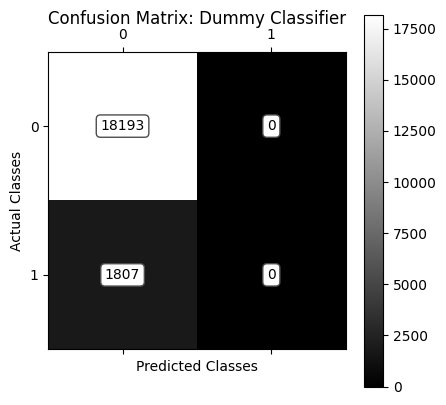

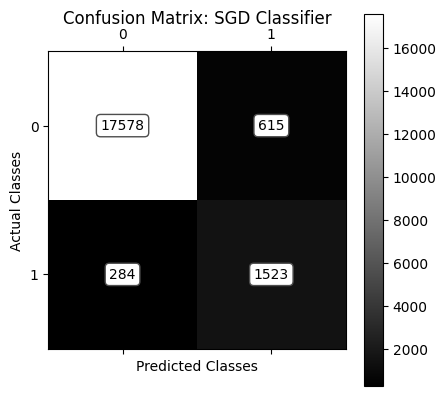

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

M_dummy = confusion_matrix(y_test_5, y_never_5_pred)
M_SGD = confusion_matrix(y_test_5, y_sgd_pred)

def plot_confusion_matrix(matrix, title):
    # matshow displays an array as a matrix
    plt.matshow(matrix, cmap=plt.cm.gray) 
    plt.title(title, pad=20)
    plt.colorbar()
    plt.ylabel('Actual Classes')
    plt.xlabel('Predicted Classes')
    
    # Overlaying number of instants
    for (i, j), z in np.ndenumerate(matrix):
        plt.text(j, i, '{:d}'.format(z), ha='center', va='center',
                 bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
    plt.show()

# Plotting
plot_confusion_matrix(M_dummy, "Confusion Matrix: Dummy Classifier")
plot_confusion_matrix(M_SGD, "Confusion Matrix: SGD Classifier")

### Qe Conclusion

```L2MatrixMult```
The essence of these exercises lies in dismantling the illusion that Accuracy is a sufficient metric for evaluating machine learning models. By implementing a "Dummy Classifier" that achieves ~90% accuracy while failing to identify a single actual digit '5', we exposed the Accuracy Paradox. This demonstrated why accuracy is dangerously misleading in imbalanced datasets.

Through the manual implementation of MyAccuracy and the generation of Confusion Matrices, focus shifted from a single percentage to the four outcomes: TP, TN, FP, and FN. The learning outcome was the realization that a model’s value depends on the balance between Precision (avoiding false alarms) and Recall (avoiding missed detections). Visualizing these via Heat-maps further reinforced how to perform "Error Analysis" to see exactly where a model fails. Ultimately, we learned that selecting the right performance metric is very important and often several matrics could be used.